In [18]:
import math
import numpy
import numpy as np
import torch
from torch import nn, optim

M = 2
d = 1024
n_ = 100
dh = 512
dv = 512
cp = 4
class TF(nn.Module):
    def __init__(self):
        super().__init__()
        self.q = nn.Linear(d, dh, bias=False)
        self.k = nn.Linear(d, dh, bias=False)
        self.v = nn.Linear(d, dv, bias=False)
        self.fc = nn.Linear(dv, 1, bias=False)
        self.fc.requires_grad_(False)
        self.q.weight.data /= 16
        self.k.weight.data /= 16
        self.v.weight.data /= 16


    def forward(self, x):
        q = self.q(x)
        k = self.k(x)
        v = self.v(x)
        qk = torch.matmul(q, k.transpose(1, 2))
        attn = qk.softmax(dim=2)
        attn = torch.sum(attn, dim=1).unsqueeze(1)
        attn /= 16
        z = torch.matmul(attn, v).squeeze(1)
        return self.fc(z)

def make_mu1(mu):
    mu1 = numpy.zeros(d)
    mu1[0] = mu
    return mu1

def make_mu2(mu):
    mu2 = numpy.zeros(d)
    mu2[1] = mu
    return mu2

def make_noise(strength):
    return numpy.random.normal(0, strength, size=d)

def get_test_loss(n, mu):
    D = []
    D_Y = []
    D_ = []
    D_Y_ = []

    mu1 = make_mu1(mu)
    mu2 = make_mu2(mu)

    D_mu = []
    D_mu_ = []

    for i in range(int(n / 2)):
        X = mu1.copy().reshape(1, d)
        X = numpy.concatenate((X, (make_noise(cp)).reshape(1, d)), 0)
        for j in range(M - 2):
            X = numpy.concatenate((X, (make_noise(0.2)).reshape(1, d)), 0)
        D.append(X)
        D_Y.append([1.]) if np.random.rand() > 0.2 else D_Y.append([-1.])
        D_mu.append(mu1.reshape(1, d))
        X = mu2.copy().reshape(1, d)
        X = numpy.concatenate((X, (make_noise(cp)).reshape(1, d)), 0)
        for j in range(M - 2):
            X = numpy.concatenate((X, (make_noise(0.2)).reshape(1, d)), 0)
        D.append(X)
        #标签反转
        D_Y.append([-1.]) if np.random.rand() > 0.2 else D_Y.append([1.])
        D_mu.append(mu2.reshape(1, d))

    D = torch.tensor(D, dtype=torch.float32).cuda()
    D_Y = torch.tensor(D_Y).cuda()

    for i in range(int(n_ / 2)):
        X = mu1.copy().reshape(1, d)
        X = numpy.concatenate((X, (make_noise(cp)).reshape(1, d)), 0)
        for j in range(M - 2):
            X = numpy.concatenate((X, (make_noise(0.2)).reshape(1, d)), 0)
        D_.append(X)
        D_Y_.append([1.])
      
        D_mu_.append(mu1.reshape(1, d))
        X = mu2.copy().reshape(1, d)
        X = numpy.concatenate((X, (make_noise(cp)).reshape(1, d)), 0)
        for j in range(M - 2):
            X = numpy.concatenate((X, (make_noise(0.2)).reshape(1, d)), 0)
        D_.append(X)
        D_Y_.append([-1.]) 
        D_mu_.append(mu2.reshape(1, d))

    D_ = torch.tensor(D_, dtype=torch.float32).cuda()
    D_Y_ = torch.tensor(D_Y_).cuda()

    model = TF().cuda()

    optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0)
    loss_fn = nn.SoftMarginLoss().cuda()
    EPOCHS = 1000

    for epoch in range(1, EPOCHS + 1):
        model.train()
        optimizer.zero_grad()
        output = model(D)

        training_loss = loss_fn(output, D_Y)
        training_loss.backward()
        optimizer.step()

        model.eval()
        output = model(D_)
        test_loss = loss_fn(output, D_Y_)

        if training_loss < 0.01:
            return test_loss

size = 100
n_scale = 2
mu_scale = 1
matrix = np.zeros((size, size))
for n in range(size):
    print(n)
    for mu in range(size):
        matrix[n, mu] = get_test_loss(int((n + 10) / 10) * n_scale, (mu + 1) * mu_scale)
np.savetxt('_0.2.npy', matrix)




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [10]:
import math
import numpy
import numpy as np
import torch
from torch import nn, optim

M = 2
d = 1024
n_ = 100
dh = 512
dv = 512
cp = 4
class TF(nn.Module):
    def __init__(self):
        super().__init__()
        self.q = nn.Linear(d, dh, bias=False)
        self.k = nn.Linear(d, dh, bias=False)
        self.v = nn.Linear(d, dv, bias=False)
        self.fc = nn.Linear(dv, 1, bias=False)
        self.fc.requires_grad_(False)
        self.q.weight.data /= 16
        self.k.weight.data /= 16
        self.v.weight.data /= 16


    def forward(self, x):
        q = self.q(x)
        k = self.k(x)
        v = self.v(x)
        qk = torch.matmul(q, k.transpose(1, 2))
        attn = qk.softmax(dim=2)
        attn = torch.sum(attn, dim=1).unsqueeze(1)
        attn /= 16
        z = torch.matmul(attn, v).squeeze(1)
        return self.fc(z)

def make_mu1(mu):
    mu1 = numpy.zeros(d)
    mu1[0] = mu
    return mu1

def make_mu2(mu):
    mu2 = numpy.zeros(d)
    mu2[1] = mu
    return mu2

def make_noise(strength):
    return numpy.random.normal(0, strength, size=d)

def get_test_loss(n, mu):
    D = []
    D_Y = []
    D_ = []
    D_Y_ = []

    mu1 = make_mu1(mu)
    mu2 = make_mu2(mu)

    D_mu = []
    D_mu_ = []

    for i in range(int(n / 2)):
        X = mu1.copy().reshape(1, d)
        X = numpy.concatenate((X, (make_noise(cp)).reshape(1, d)), 0)
        for j in range(M - 2):
            X = numpy.concatenate((X, (make_noise(0.2)).reshape(1, d)), 0)
        D.append(X)
        D_Y.append([1.])
        D_mu.append(mu1.reshape(1, d))
        X = mu2.copy().reshape(1, d)
        X = numpy.concatenate((X, (make_noise(cp)).reshape(1, d)), 0)
        for j in range(M - 2):
            X = numpy.concatenate((X, (make_noise(0.2)).reshape(1, d)), 0)
        D.append(X)
        D_Y.append([-1.])
        D_mu.append(mu2.reshape(1, d))

    D = torch.tensor(D, dtype=torch.float32).cuda()
    D_Y = torch.tensor(D_Y).cuda()

    for i in range(int(n_ / 2)):
        X = mu1.copy().reshape(1, d)
        X = numpy.concatenate((X, (make_noise(cp)).reshape(1, d)), 0)
        for j in range(M - 2):
            X = numpy.concatenate((X, (make_noise(0.2)).reshape(1, d)), 0)
        D_.append(X)
        D_Y_.append([1.])
        D_mu_.append(mu1.reshape(1, d))
        X = mu2.copy().reshape(1, d)
        X = numpy.concatenate((X, (make_noise(cp)).reshape(1, d)), 0)
        for j in range(M - 2):
            X = numpy.concatenate((X, (make_noise(0.2)).reshape(1, d)), 0)
        D_.append(X)
        D_Y_.append([-1.])
        D_mu_.append(mu2.reshape(1, d))

    D_ = torch.tensor(D_, dtype=torch.float32).cuda()
    D_Y_ = torch.tensor(D_Y_).cuda()

    model = TF().cuda()

    optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0)
    loss_fn = nn.SoftMarginLoss().cuda()
    EPOCHS = 1000

    for epoch in range(1, EPOCHS + 1):
        model.train()
        optimizer.zero_grad()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        output = model(D)

        training_loss = loss_fn(output, D_Y)
        training_loss.backward()
        optimizer.step()

        model.eval()
        output = model(D_)
        test_loss = loss_fn(output, D_Y_)

        if training_loss < 0.01:
            return test_loss

size = 100
n_scale = 2
mu_scale = 1
matrix = np.zeros((size, size))
for n in range(size):
    print(n)
    for mu in range(size):
        matrix[n, mu] = get_test_loss(int((n + 10) / 10) * n_scale, (mu + 1) * mu_scale)
np.savetxt('matrix.npy', matrix)




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


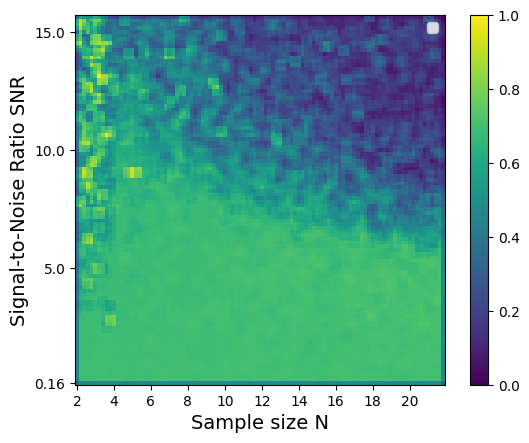

In [5]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import convolve

# 禁用LaTeX渲染
matplotlib.rcParams['text.usetex'] = False

size = 100
matrix = np.loadtxt('_0.2.npy')
matrix[np.isnan(matrix)] = 0

# 对矩阵进行处理，计算每一个矩阵周围的平均值
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9

# 使用卷积计算每个元素及其周围元素的平均值
matrix = convolve(matrix, kernel, mode='constant', cval=0.0)

matrix = matrix.T


# matrix[matrix > 0.85] = 1.2
# matrix[matrix < 0.5] = 0

# matrix[(matrix > 0.5)&(matrix < 0.6)] = 0.8
# x = []
# y = []
# 自己生成拟合的曲线
# for i in range(size):
#     x.append(i + 1)
#     y.append(60480 / (i + 10)**0.5 +30)
# plt.plot(x, y, color='red', linewidth=5, label=r'$N \cdot \mathrm{SNR}^2 = 1000$')

# 根据理论拟合的曲线
x = np.linspace(0.1, 100, 400)  # 从0.1开始以避免除以0的错误

# 计算y的值
y = 520 / np.sqrt(x)

# 创建图形
plt.figure()

# 绘制曲线
# plt.plot(x, y, color='red', linewidth=5 ,label=r'$N \cdot \mathrm{SNR}^2 = Ω(1)$' )

# matrix[matrix < 0.2] = 0
# matrix[matrix >= 0.2] = 1
vmin = 0
vmax = 1

#将矩阵中对应位置上的值转换为颜色
# cmap 参数指定颜色映射（colormap），用于将矩阵中的数值映射为颜色。
# 'viridis' 是一种常用的颜色映射，从紫色到黄色渐变
# 'nearest' 表示使用最近邻插值，即每个像素直接使用矩阵中对应位置的值
# origin 参数指定矩阵的起始位置'lower' 表示矩阵的第一行对应图像的下方，最后一行对应图像的上方。
# plt.imshow(matrix, cmap='viridis', interpolation='nearest', origin='lower')
plt.imshow(matrix, cmap='viridis', interpolation='nearest', origin='lower', vmin=vmin, vmax=vmax)
#添加一个颜色条，由最大值和最小值决定，出现白色的点说明出现了异常值
plt.colorbar()


plt.ylabel('Signal-to-Noise Ratio SNR', size=14)
plt.xlabel('Sample size N', size=14)

y_label = np.array((0.16, 5, 10, 15))
x_label = np.arange(2, 22, 2)
y_ticks = np.array((0, 31, 63, 95))
x_ticks = np.arange(0, size, 10)

plt.xticks(x_ticks, x_label)
plt.yticks(y_ticks, y_label)




plt.legend(loc='best')

plt.savefig('heatmap-0.2.png', dpi=300, bbox_inches='tight')

plt.show()

#随着映射范围的变化而发生改变
#M=2,标签反转0.1
# matrix[matrix < 0.5] = 0
# matrix[matrix >= 0.5] = 1
#M=2,标签反转0.01
# matrix[matrix < 0.25] = 0
# matrix[matrix >= 0.25] = 1
#M=2,标签反转0.001
# matrix[matrix < 0.1] = 0
# matrix[matrix >= 0.1] = 1
# plt.cla()
# plt.clf()

# plt.figure(1)
# plt.plot(x, y, color='red', linewidth=5, label=r'$N \cdot \mathrm{SNR}^2 = 1000$')
# plt.imshow(matrix, cmap='viridis', interpolation='nearest', origin='lower')
# plt.colorbar()
# plt.xlabel('Signal-to-Noise Ratio SNR', size=14)
# plt.ylabel('Sample size N', size=14)
# plt.xticks(x_ticks, x_label)
# plt.yticks(y_ticks, y_label)
# plt.legend(loc='best')



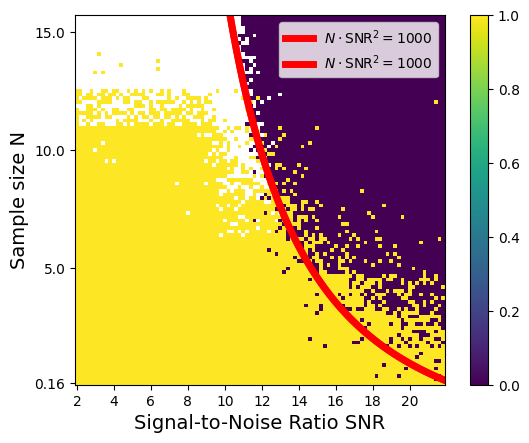

In [3]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

# 禁用LaTeX渲染
matplotlib.rcParams['text.usetex'] = False

size = 100
matrix = np.loadtxt('0.npy')

x = []
y = []
# 生成拟合的曲线
for i in range(size):
    x.append(i + 1)
    y.append(204800 / (i + 1)**2 - 20)
plt.plot(x, y, color='red', linewidth=5, label=r'$N \cdot \mathrm{SNR}^2 = 1000$')


#将矩阵中对应位置上的值转换为颜色
# cmap 参数指定颜色映射（colormap），用于将矩阵中的数值映射为颜色。
# 'viridis' 是一种常用的颜色映射，从紫色到黄色渐变
# 'nearest' 表示使用最近邻插值，即每个像素直接使用矩阵中对应位置的值
# origin 参数指定矩阵的起始位置'lower' 表示矩阵的第一行对应图像的下方，最后一行对应图像的上方。
# plt.imshow(matrix, cmap='viridis', interpolation='nearest', origin='lower')
# #添加一个颜色条，由最大值和最小值决定，出现白色的点说明出现了异常值
# plt.colorbar()


# plt.xlabel('Signal-to-Noise Ratio SNR', size=14)
# plt.ylabel('Sample size N', size=14)

# x_label = np.array((0.16, 5, 10, 15))
# y_label = np.arange(2, 22, 2)
# x_ticks = np.array((0, 31, 63, 95))
# y_ticks = np.arange(0, size, 10)

# plt.xticks(x_ticks, x_label)
# plt.yticks(y_ticks, y_label)
# plt.legend(loc='best')
# # plt.savefig('0.1heatmap.png', dpi=1200, bbox_inches='tight')
#随着映射范围的变化而发生改变
#M=2,标签反转0.1
# matrix[matrix < 0.5] = 0
# matrix[matrix >= 0.5] = 1
#M=2,标签反转0.01
# matrix[matrix < 0.2] = 0
# matrix[matrix >= 0.2] = 1
#M=2,标签反转0.001
matrix[matrix < 0.1] = 0
matrix[matrix >= 0.1] = 1
# plt.cla()
# plt.clf()

plt.figure(1)
plt.plot(x, y, color='red', linewidth=5, label=r'$N \cdot \mathrm{SNR}^2 = 1000$')
plt.imshow(matrix, cmap='viridis', interpolation='nearest', origin='lower')
plt.colorbar()
plt.xlabel('Signal-to-Noise Ratio SNR', size=14)
plt.ylabel('Sample size N', size=14)
plt.xticks(x_ticks, x_label)
plt.yticks(y_ticks, y_label)
plt.legend(loc='best')

